In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

In [2]:
os.getcwd()

'C:\\Users\\Venkatesh'

In [3]:
os.chdir('C://Users//Venkatesh')

In [4]:
df = pd.read_csv("C:/mlmodel/files_for_training_model/heart_data.csv")

In [5]:
df

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224
...,...,...,...,...
493,494,47.660440,27.562464,11.294392
494,495,45.097203,21.385620,9.616762
495,496,8.279743,6.423720,13.495168
496,497,42.345863,20.741328,10.115865


In [6]:
print(df.head())

   Unnamed: 0     biking    smoking  heart.disease
0           1  30.801246  10.896608      11.769423
1           2  65.129215   2.219563       2.854081
2           3   1.959665  17.588331      17.177803
3           4  44.800196   2.802559       6.816647
4           5  69.428454  15.974505       4.062224


0.9811067878031208
487     6.756015
73      9.466026
231    14.088654
175    13.377430
237    16.384678
         ...    
193    14.547755
5       9.550046
116    14.411483
45     12.328899
16      5.443342
Name: heart.disease, Length: 150, dtype: float64 [ 5.61417231  9.23854928 15.77064591 13.96271678 16.97258754 13.38551065
  7.02565417  9.49069576  6.83117942 12.07219675  8.04307687 10.14595377
  5.91159788 10.14538696  7.3415733  17.65460707  4.15655062  6.87547269
  5.24683245  6.77480127  2.08250582  7.39533445 12.03453847 13.99326278
 12.09739539 13.60433903  6.19490735  9.56118094 13.94750676 11.82223539
  8.52602497 11.48105164 12.41957266 17.7284097   3.53706181  6.09047121
  8.17208463  7.50053942 12.56170624 10.47015413  4.88309485  4.00779535
  7.798394   10.9073288  10.77541879  8.85290916 17.03995211  7.50903037
 18.06939528  4.58997823  1.73224979  5.01082459  6.82467948 15.23572133
  9.30772808  6.34302188  8.37575419 10.34808915 13.74750805  3.50515222
  7.30319722  6

C:\Users\Venkatesh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


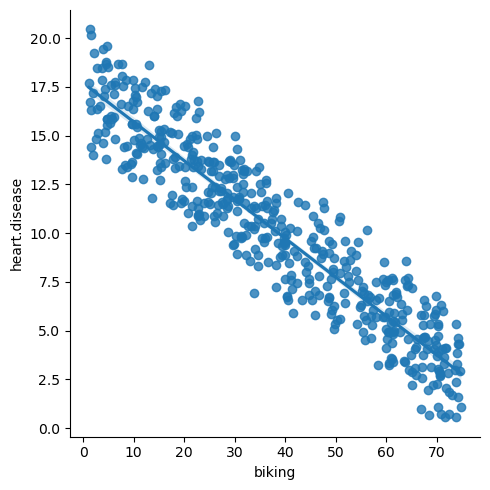

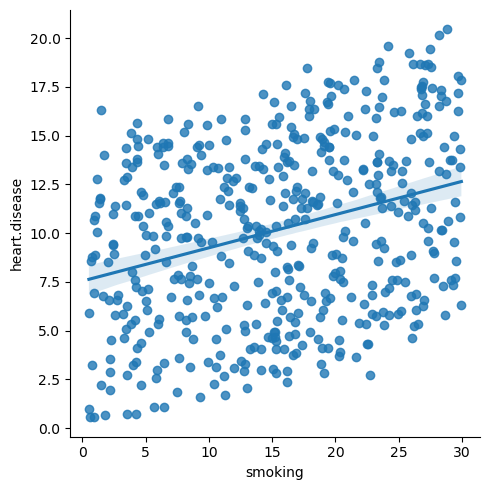

In [7]:

df = df.drop("Unnamed: 0", axis=1)
#A few plots in Seaborn to understand the data

sns.lmplot(x='biking', y='heart.disease', data=df)  
sns.lmplot(x='smoking', y='heart.disease', data=df)  


x_df = df.drop('heart.disease', axis=1)
y_df = df['heart.disease']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=42)

from sklearn import linear_model

#Create Linear Regression object
model = linear_model.LinearRegression()

#Now let us call fit method to train the model using independent variables.
#And the value that needs to be predicted (Images_Analyzed)

model.fit(X_train, y_train) #Indep variables, dep. variable to be predicted
print(model.score(X_train, y_train))  #Prints the R^2 value, a measure of how well


prediction_test = model.predict(X_test)    
print(y_test, prediction_test)
print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)

import pickle
pickle.dump(model, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[20.1, 56.3]]))


#Model is ready. Let us check the coefficients, stored as reg.coef_.
#These are a, b, and c from our equation. 
#Intercept is stored as reg.intercept_
#print(model.coef_, model.intercept_)

#All set to predict the number of images someone would analyze at a given time
#print(model.predict([[13, 2, 23]]))
